In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
input_shape = [224, 224,3]
img_width = 224
img_height = 224

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [5]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')
folders

['Datasets/train\\Shirt', 'Datasets/train\\Tshirt']

In [6]:
# Used to rescale the pixel value from [0,255] to [0,1] interval
datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
# automatically retrive images and there classes fro train and validation sets
train_genrator=datagen.flow_from_directory(train_path,
                                         target_size=(img_width,img_height),
                                         batch_size = 32,
                                         class_mode = 'binary')
test_genrato =datagen.flow_from_directory(valid_path,
                                         target_size=(img_height,img_height),
                                         batch_size=32,
                                         class_mode= 'binary')

Found 794 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


In [8]:
#first convolution extracts 32 filters that are 3x3
#Convolution is followed by max-pooling layer with a 2x2 windows
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


#Second convolution extracts 32 filters that are 3x3
#Convolution is followed by max-pooling layer with a 2x2 windows
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

#Third Convolution extract 128 filters that are 3x3
#Convolution is followed by max-pooling layers with 2x2 windows
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

#Flatten layers amp to a 1-dim tensor so we can add fully connected layers
model.add(Flatten())

#Creat a fully connected layers with Relu activation and 128 hidden layers
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

#create a output layers with two nodes and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# view the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       7

In [10]:
# tell the model what cost and optimization method to use
model.compile(
   loss='binary_crossentropy',
   optimizer='adam',
   metrics= ['accuracy']
)

In [11]:
# Use the Image Data Generator to import the image from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,             # normalize the pixel value to [0,1]
                                   shear_range = 0.2,            # randomlly apply a shearing transormation
                                   zoom_range = 0.2,             # randomlly apply a shearing transormation
                                   rotation_range = 30,
                                   horizontal_flip = True)       # randomlly filp the image

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 794 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 34 images belonging to 2 classes.


# Training our Model

In [14]:
# fit the model
# Run the cell. It will take some time to execute
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
25/25 [==============================] - 102s 4s/step - loss: 15.4609 - accuracy: 0.5894 - val_loss: 0.6792 - val_accuracy: 0.5000
Epoch 2/50
25/25 [==============================] - 99s 4s/step - loss: 0.6103 - accuracy: 0.6902 - val_loss: 0.6712 - val_accuracy: 0.5000
Epoch 3/50
25/25 [==============================] - 97s 4s/step - loss: 0.5666 - accuracy: 0.6977 - val_loss: 0.6344 - val_accuracy: 0.5000
Epoch 4/50
25/25 [==============================] - 98s 4s/step - loss: 0.5654 - accuracy: 0.6877 - val_loss: 0.5834 - val_accuracy: 0.5294
Epoch 5/50
25/25 [==============================] - 98s 4s/step - loss: 0.5270 - accuracy: 0.6864 - val_loss: 0.5505 - val_accuracy: 0.5294
Epoch 6/50
25/25 [==============================] - 100s 4s/step - loss: 0.5061 - accuracy: 0.7065 - val_loss: 0.5297 - val_accuracy: 0.5882
Epoch 7/50
25/25 [==============================] - 105s 4s/step - loss: 0.4961 - accuracy: 0.7154 - val_loss: 0.6219 - val_accuracy: 0.6176
Epoch 8/50
25/25

## Ploting our Loss and Accuracy Charts

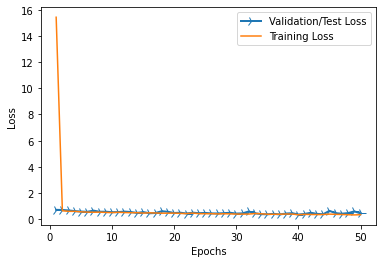

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

#Plot the loss
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs= range(1, len(loss_values) + 1)


line1 = plt.plot(epochs,val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs,loss_values, label = "Training Loss")
plt.setp(line1,linewidth = 2.0, marker = "+", markersize=10.0)
plt.setp(line1,linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid=(True)
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

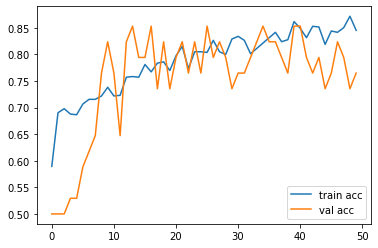

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [17]:
history.history

{'loss': [15.460898399353027,
  0.6102805733680725,
  0.5665929913520813,
  0.5654315948486328,
  0.5269976258277893,
  0.5060706734657288,
  0.4960911273956299,
  0.502301812171936,
  0.480154812335968,
  0.469974547624588,
  0.4923313558101654,
  0.4732334017753601,
  0.46144425868988037,
  0.4649122357368469,
  0.4306100904941559,
  0.4544849395751953,
  0.4359677731990814,
  0.42436522245407104,
  0.42441684007644653,
  0.43086013197898865,
  0.40652984380722046,
  0.39370086789131165,
  0.4297758638858795,
  0.3897075653076172,
  0.38480108976364136,
  0.3881314694881439,
  0.3662703335285187,
  0.3845624327659607,
  0.3718907833099365,
  0.3565058410167694,
  0.3535595238208771,
  0.35619837045669556,
  0.39867204427719116,
  0.380231112241745,
  0.344001442193985,
  0.34206995368003845,
  0.34382858872413635,
  0.35966673493385315,
  0.35661184787750244,
  0.30260246992111206,
  0.3340270519256592,
  0.3248271346092224,
  0.31692302227020264,
  0.322435587644577,
  0.35288166999

# #Saving the Model

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_agumented_cnn.h5')
print("Model Saved")

Model Saved


In [19]:
import os
import numpy as np

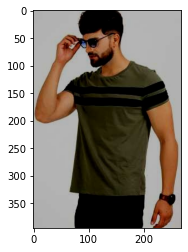

In [21]:

from tensorflow.keras.preprocessing import image

input_image_path = 'D:/Data Agumentation/Datasets/test/Tshirt/imageT5.jpeg'


#show out input image for Feature Visualization
img1 = image.load_img(input_image_path)
plt.imshow(img1);


img_size = (224, 224)

# Load a image into a  4D Tensor,convert it to a numpy array and expand to 4 dim
img1 = image.load_img(input_image_path, target_size = img_size)
image_tensor = image.img_to_array(img1)
#print("image_tensor.shape")
image_tensor = image_tensor/255
image_tensor = np.expand_dims (image_tensor, axis=0)
#print(img.shape)

# #Create a model form an input tensor and list of output tensors
To extract feature maps we create a keras model that take a batches of image as input and outputs the activation of all convolution and pooling layers

In [22]:
from keras import models

# Extract the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:9]]

#Creates a modelthat returns these output given the model input
activation_model = models.Model(inputs=model.input,  outputs=layer_outputs)

## Run our image through our models prediction fuction

In [23]:
activations =activation_model.predict(image_tensor)

In [24]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 224, 224, 32)


### Let's take a look at the first channel


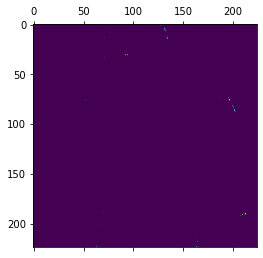

In [25]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :,1], cmap='viridis')

## let's Plot all 32

C:\ProgramData\Anaconda3\envs\scrapro\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


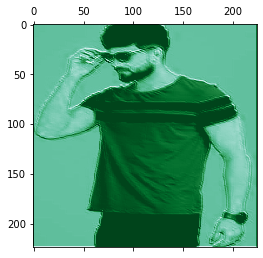

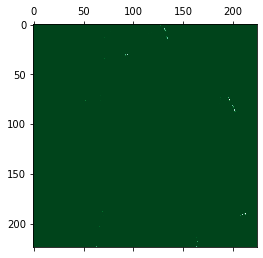

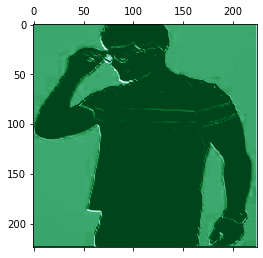

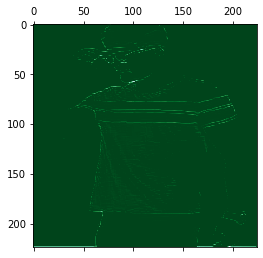

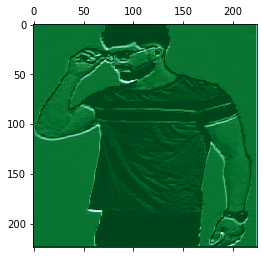

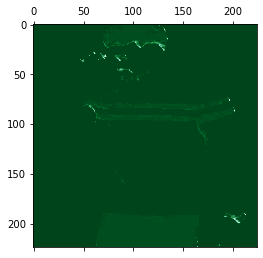

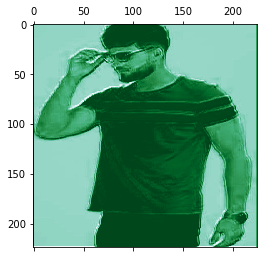

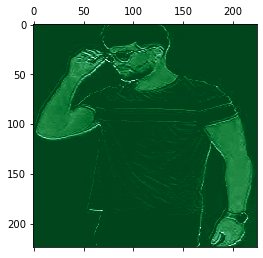

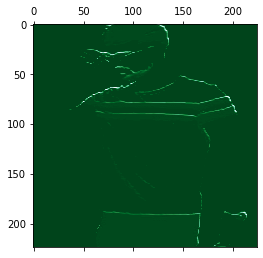

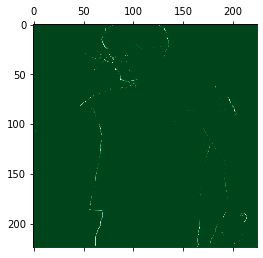

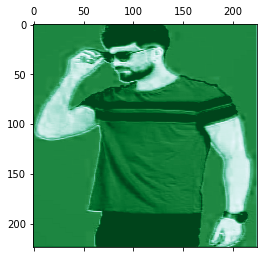

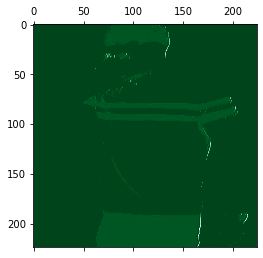

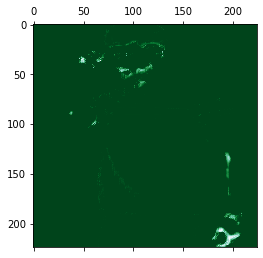

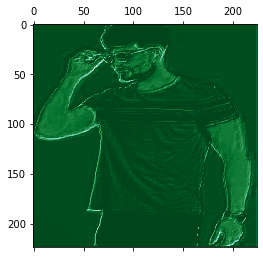

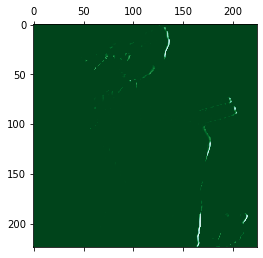

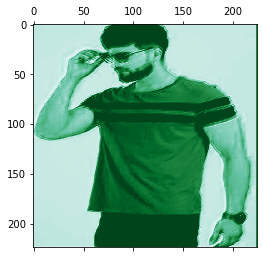

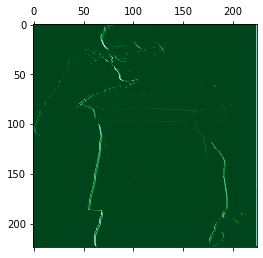

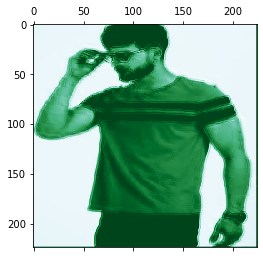

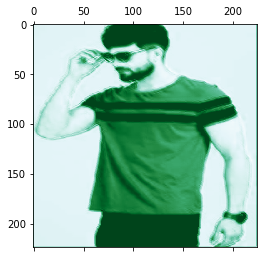

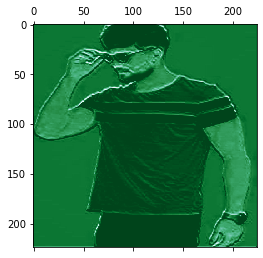

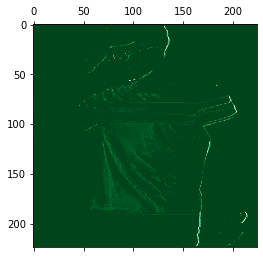

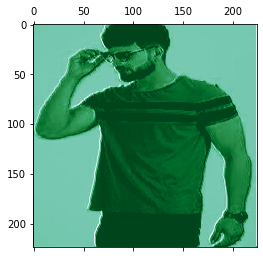

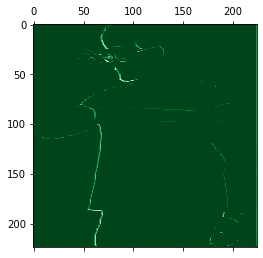

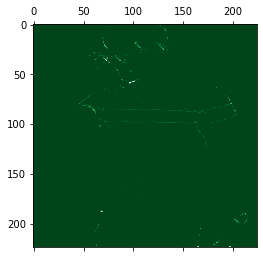

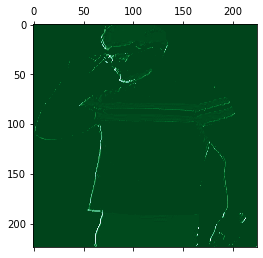

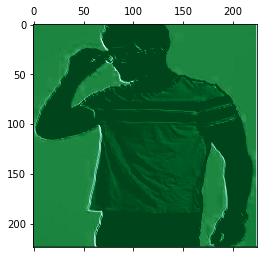

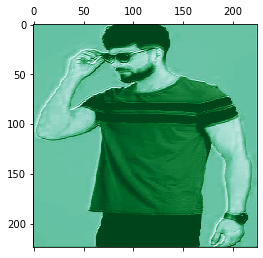

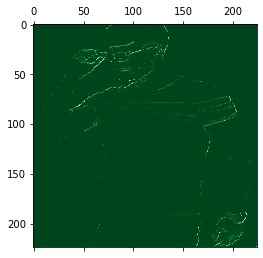

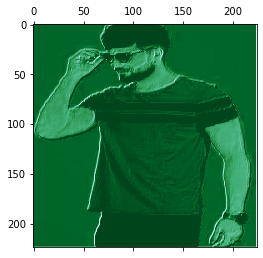

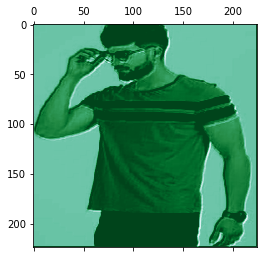

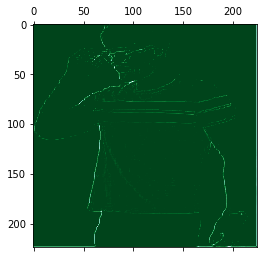

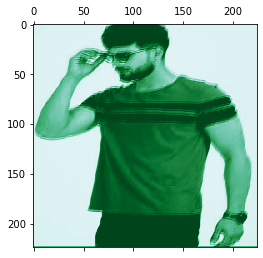

In [26]:
for i in range(0,32):
    plt.matshow(first_layer_activation[0,:, :,i], cmap='BuGn_r')